In [26]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']]
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.columns=['label','text']
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


GAUSSIAN NAIVE BAYES FOR CONTINUOUS DATA 

In [28]:
#feature engineering: extract numerical features
df['text_length']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x: len(x.split()))
df['num_digits']=df['text'].apply(lambda x: sum(c.isdigit() for c in x))
X=df[['text_length','num_words','num_digits']]
y=df['label']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred_gnb=gnb.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=(y_pred_gnb==y_test).mean()
accuracy

np.float64(0.9802690582959641)

In [33]:
cm1=confusion_matrix(y_test,y_pred_gnb)
cm1

array([[953,  12],
       [ 10, 140]])

In [34]:
print("Classification report:",classification_report(y_test,y_pred_gnb))

Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



MULTINOMIAL NAIVE BAYES FOR TEXT DATA

In [35]:
# convert text data into word count vectors
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english')
X_counts=vectorizer.fit_transform(df['text'])

#convert counts to tf-idf representation
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer() #calculates frequency
X_tfidf=tfidf_transformer.fit_transform(X_counts)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,df['label'],test_size=0.2,random_state=42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

In [38]:
accuracy=(y_pred_mnb==y_test).mean()
accuracy

np.float64(0.968609865470852)

In [39]:
cm2=confusion_matrix(y_test,y_pred_mnb)
cm2

array([[965,   0],
       [ 35, 115]])

In [40]:
print("Classification report:",classification_report(y_test,y_pred_mnb))

Classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



BERNOULLI NAIVE BAYES FOR BINARY FEATURES

In [41]:
important_words=["free","win","offer","money","urgent"]
for word in important_words:
    df[word]=df['text'].apply(lambda x:1 if word in x.lower() else 0)

X=df[important_words]
y=df['label']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

In [44]:
accuracy=(y_pred_bnb==y_test).mean()
accuracy

np.float64(0.895067264573991)

In [45]:

cm3 =confusion_matrix(y_test,y_pred_bnb)
cm3


array([[929,  36],
       [ 81,  69]])

In [46]:
print("Classification report:",classification_report(y_test,y_pred_mnb))

Classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



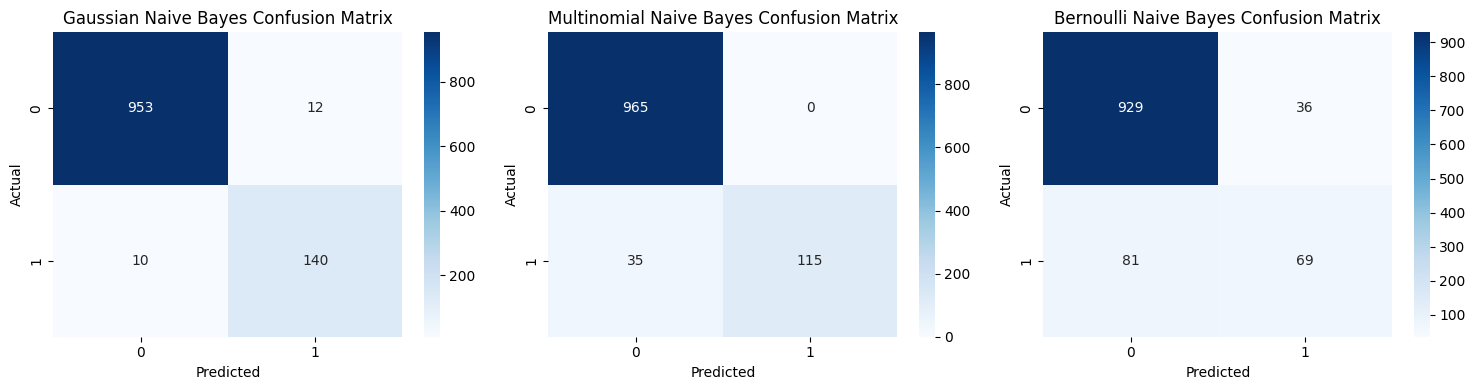

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title("Bernoulli Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()